In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dkistpkg_ct as DKIST_Analysis

In [2]:
file = '/Users/coletamburri/Desktop/11_Aug_2024_Cclass_Flare/Processed_ViSP_VBI_11Aug2024/ViSP_spectra_processed_11Aug24_CaII.npz'
caII_low = 570
caII_high = 730
hep_low = 730
hep_high = 900

hep_inner_low = 810
hep_inner_high = 825

caii_inner_low = 620
caii_inner_high = 680

hbeta_low = 500
hbeta_high = 650

In [3]:
data = np.load(file)
wl = data['wl']
flare = data['flare']
time = data['time']

In [61]:
core = flare[:,650,:]

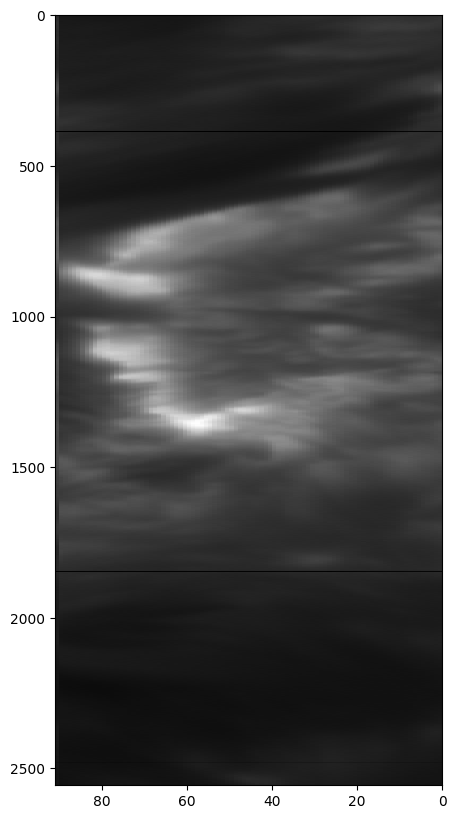

In [60]:
scan = core[149:240,:]
scanfull = flare[149:240,:,:]

fig,ax=plt.subplots(figsize=(5,10))
ax.pcolormesh(np.transpose(scan),cmap='grey')
ax.invert_xaxis()
ax.invert_yaxis()

In [68]:
kern = scan[68:83,1075:1175]
kernfull = scanfull[68:83,:,1075:1175]

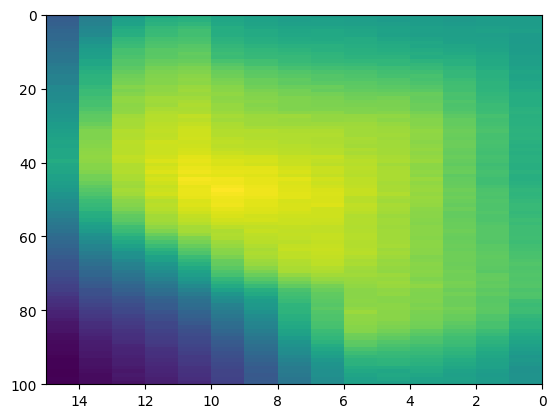

In [69]:
fig,ax=plt.subplots()
ax.pcolormesh(np.transpose(kern))
ax.invert_xaxis()
ax.invert_yaxis()

In [71]:
14*0.1*727/0.54

1884.8148148148148

In [72]:
60*0.0295*727

1286.79

In [73]:
def spec_avg(spec):
    nx,nw,ny = np.shape(spec)
    wl_avg = np.zeros(np.shape(spec)[1])
    for i in range(nw):
        wl_avg[i] = np.mean(spec[:,i,:])

    return wl_avg
            

In [74]:
avgspec = spec_avg(kernfull)

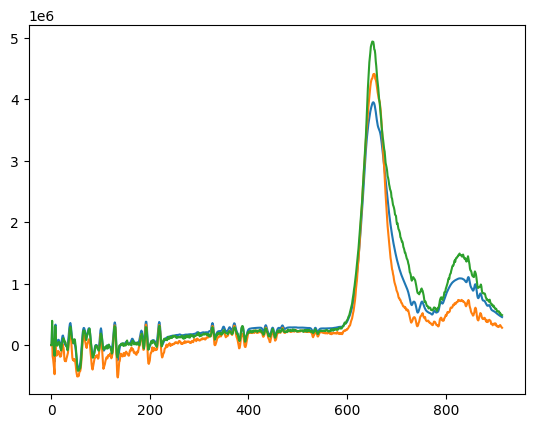

In [78]:
plt.plot(avgspec)
plt.plot(kernfull[2,:,70])
plt.plot(kernfull[8,:,53])

In [50]:
nw

915

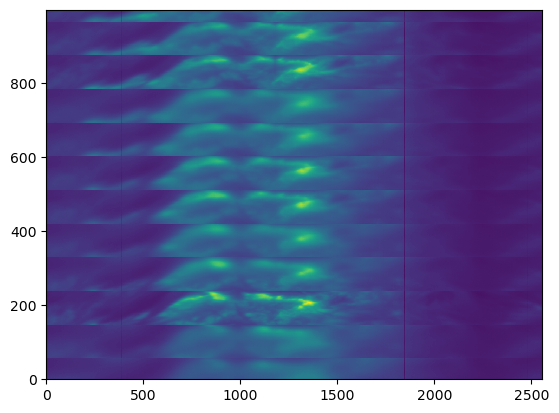

In [5]:
plt.pcolormesh(flare[:,650,:])

In [17]:
caii_avg = np.mean(flare[:,caII_low:caII_high,:],1)
hep_avg = np.mean(flare[:,hep_low:hep_high,:],1)
full = np.mean(flare,1)

In [20]:
firststart = 57

lc_caii = []
lc_hep = []
lc_full = []

for i in range(9):
    lc_caii.append(np.mean(caii_avg[firststart+i*91:firststart+(i+1)*91,:]))
    lc_hep.append(np.mean(hep_avg[firststart+i*91:firststart+(i+1)*91,:]))
    lc_full.append(np.mean(full[firststart+i*91:firststart+(i+1)*91,:]))

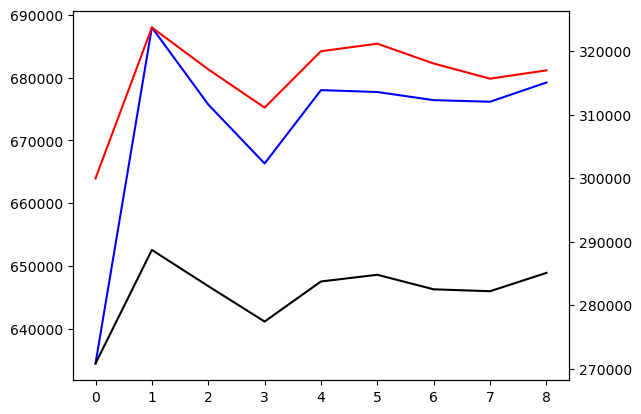

In [24]:
fig,ax=plt.subplots()
ax2=ax.twinx()
ax.plot(lc_caii,c='blue')
ax2.plot(lc_hep,c='red')
ax2.plot(lc_full,c='black')